In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import openpyxl

In [2]:
df = pd.read_excel("/home/rest/forpyzx/excel/20241204output.xlsx",sheet_name='Sheet1',header=1)

#original,gates=1000,p_t=0.1,qubit=4を抽出
#print(df[(df["optimize_name"] == "original") & (df["gates_bef"] == 1000) & (df["p_t"] == 0.2) & (df["qubits"] == 4)])

/home/rest/forpyzx/venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


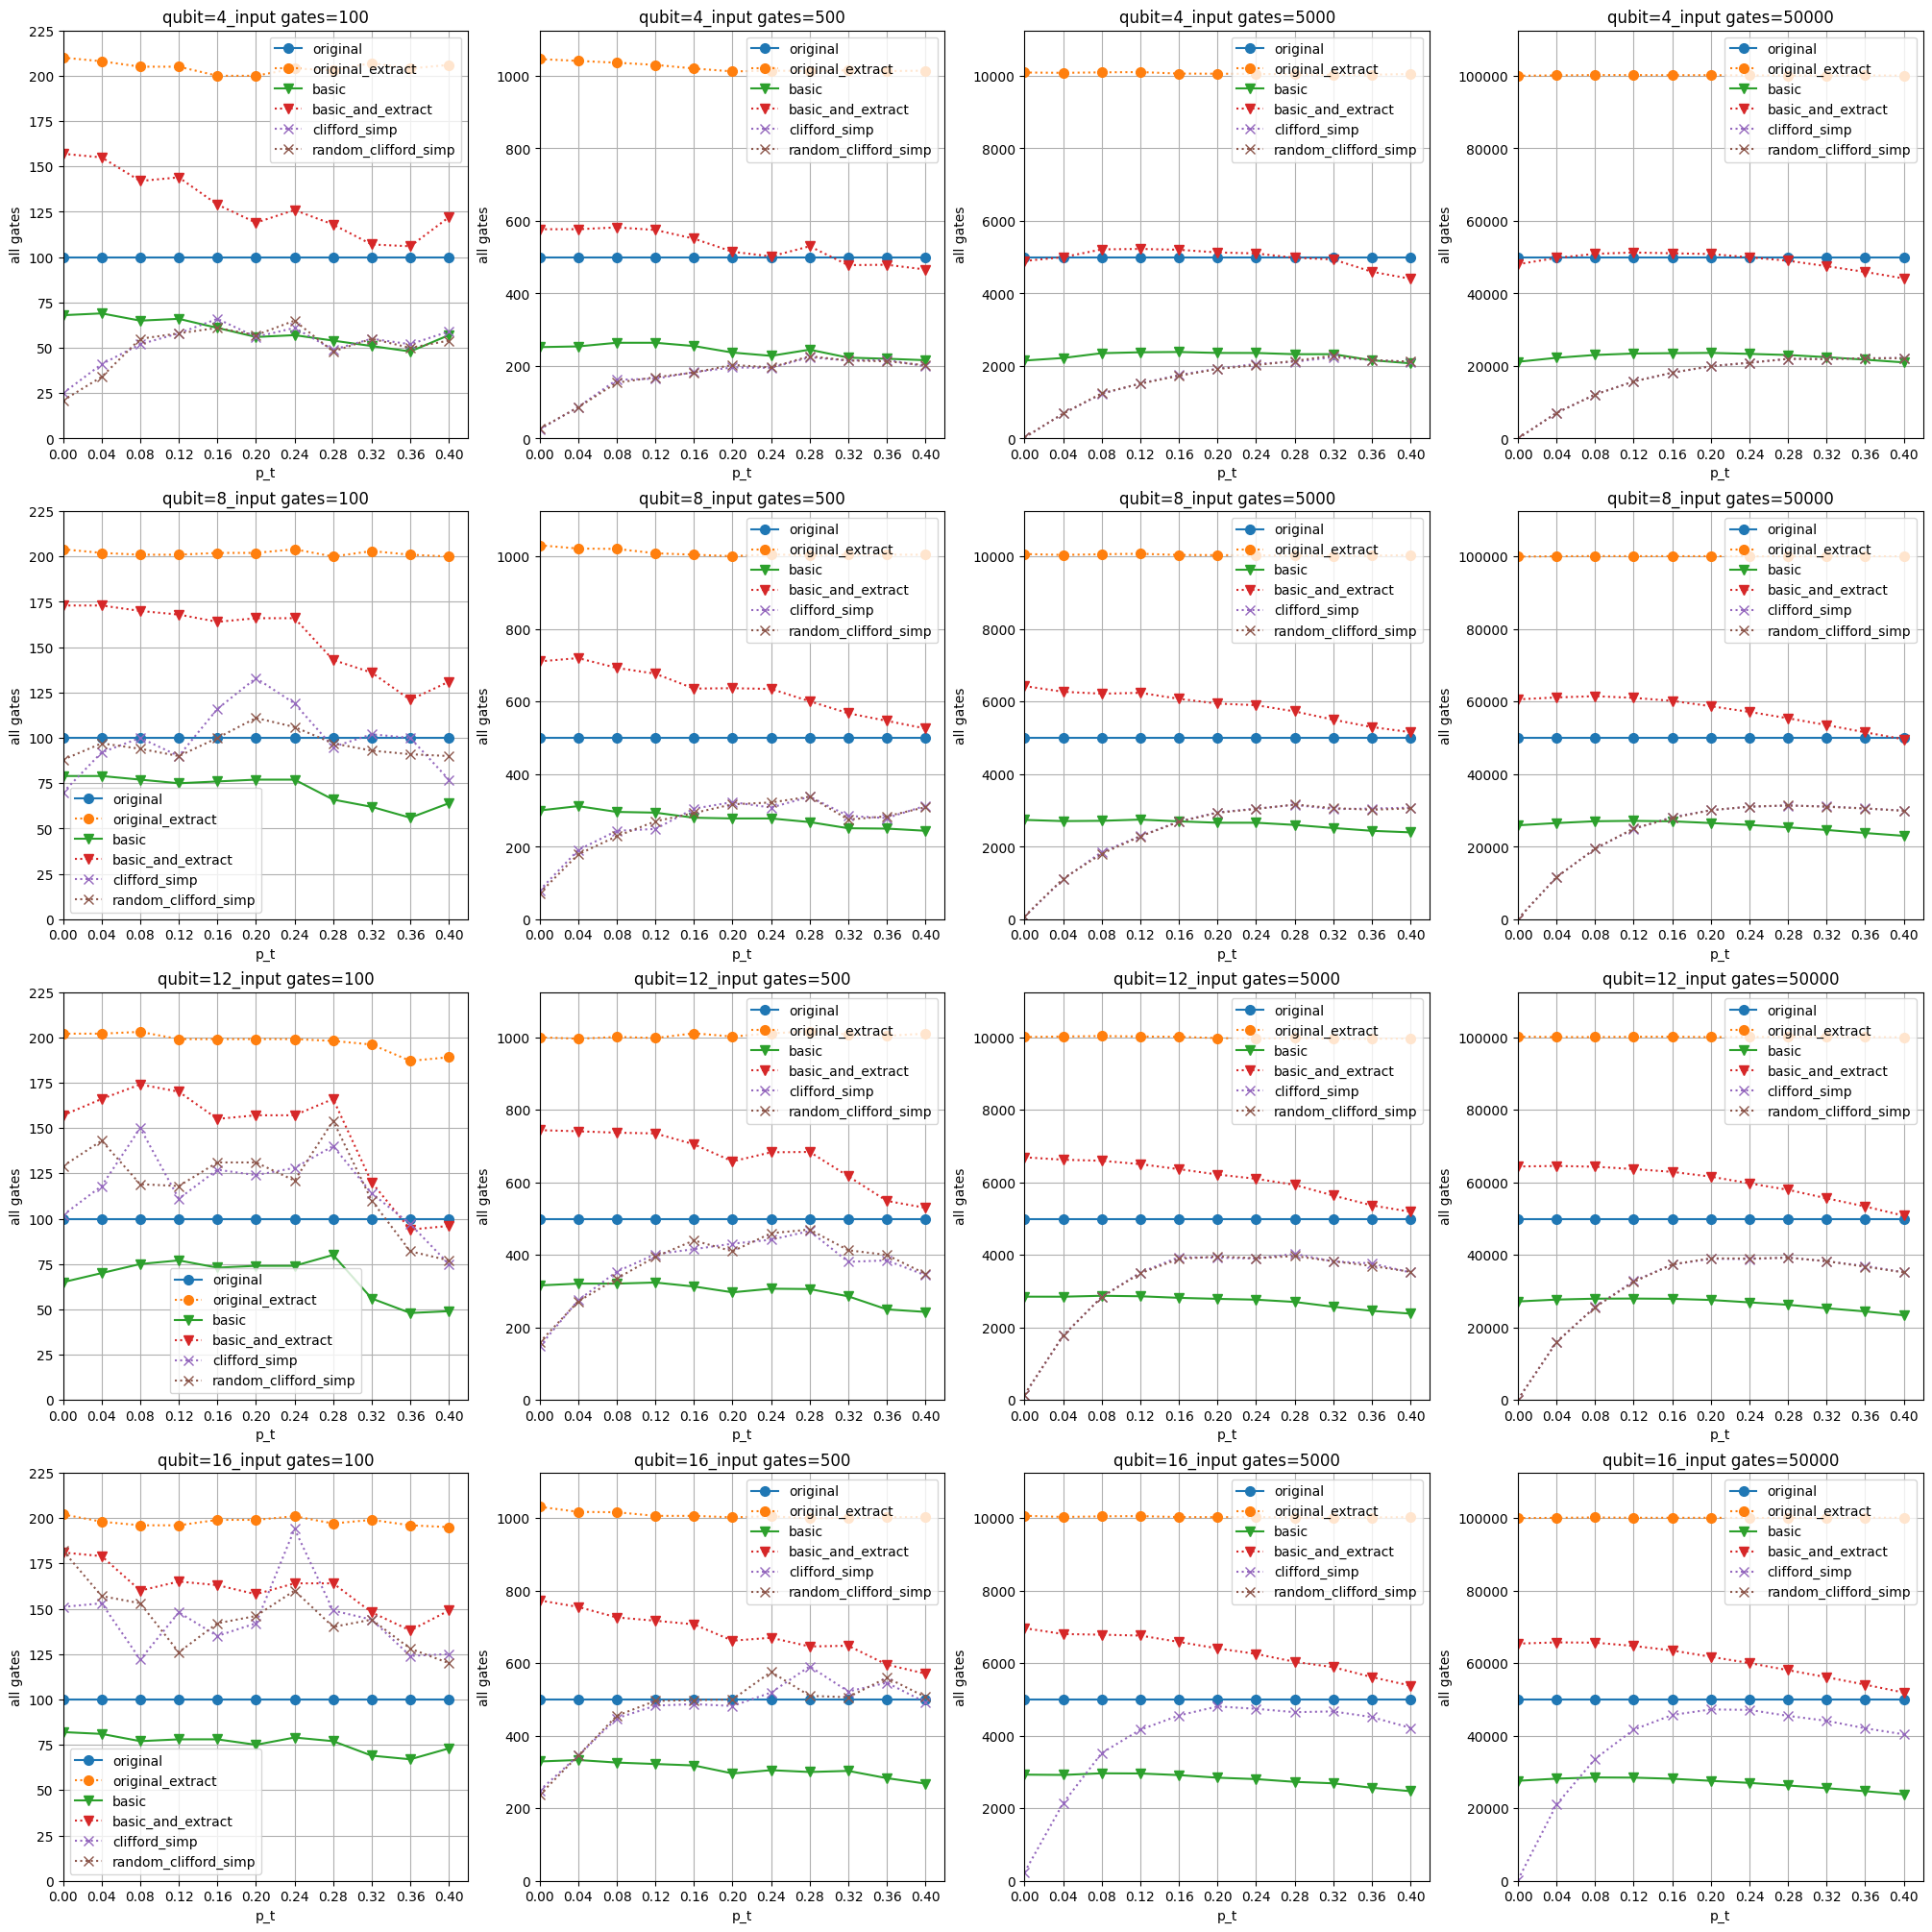

In [3]:
qubits = [4,8,12,16]
gates = [100,500,5000,50000]
p_t_lists = [i * 0.04 for i in range(0, 11)]
optimize_name = ["original","original_extract","basic","basic_and_extract","clifford_simp","random_clifford_simp"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits), len(gates),figsize=(20, 20),constrained_layout=True)

#p_tを変化させた時のゲート数
for qubit in range(len(qubits)):
    for gate in range(len(gates)):
        ax[qubit][gate].set_title(f"qubit={qubits[qubit]}_input gates={gates[gate]}")
        ax[qubit][gate].set_xlabel("p_t")
        ax[qubit][gate].set_ylabel("all gates")
        ax[qubit][gate].set_xlim(min(p_t_lists),max(p_t_lists)+0.02)
        ax[qubit][gate].set_xticks(p_t_lists)
        ax[qubit][gate].set_ylim(0,gates[gate]*2.25)
        ax[qubit][gate].grid(True)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) & (df["gates_bef"] == gates[gate]) & (df["qubits"] == qubits[qubit])]
            if optimize == "clifford_simp" or optimize == "random_clifford_simp":
                plot_style = 'x'
            elif optimize == "basic" or optimize == "basic_and_extract":
                plot_style = 'v'
            else: 
                plot_style = 'o'

            if optimize == "original_extract" or optimize == "basic_and_extract" or optimize == "clifford_simp" or optimize == "random_clifford_simp":
                ls = ':'
            else:
                ls = '-'
            ax[qubit][gate].plot(data["p_t"],data["gates_aft"],plot_style,linestyle=ls,markersize=7,label=optimize)
            ax[qubit, gate].legend()

plt.show()

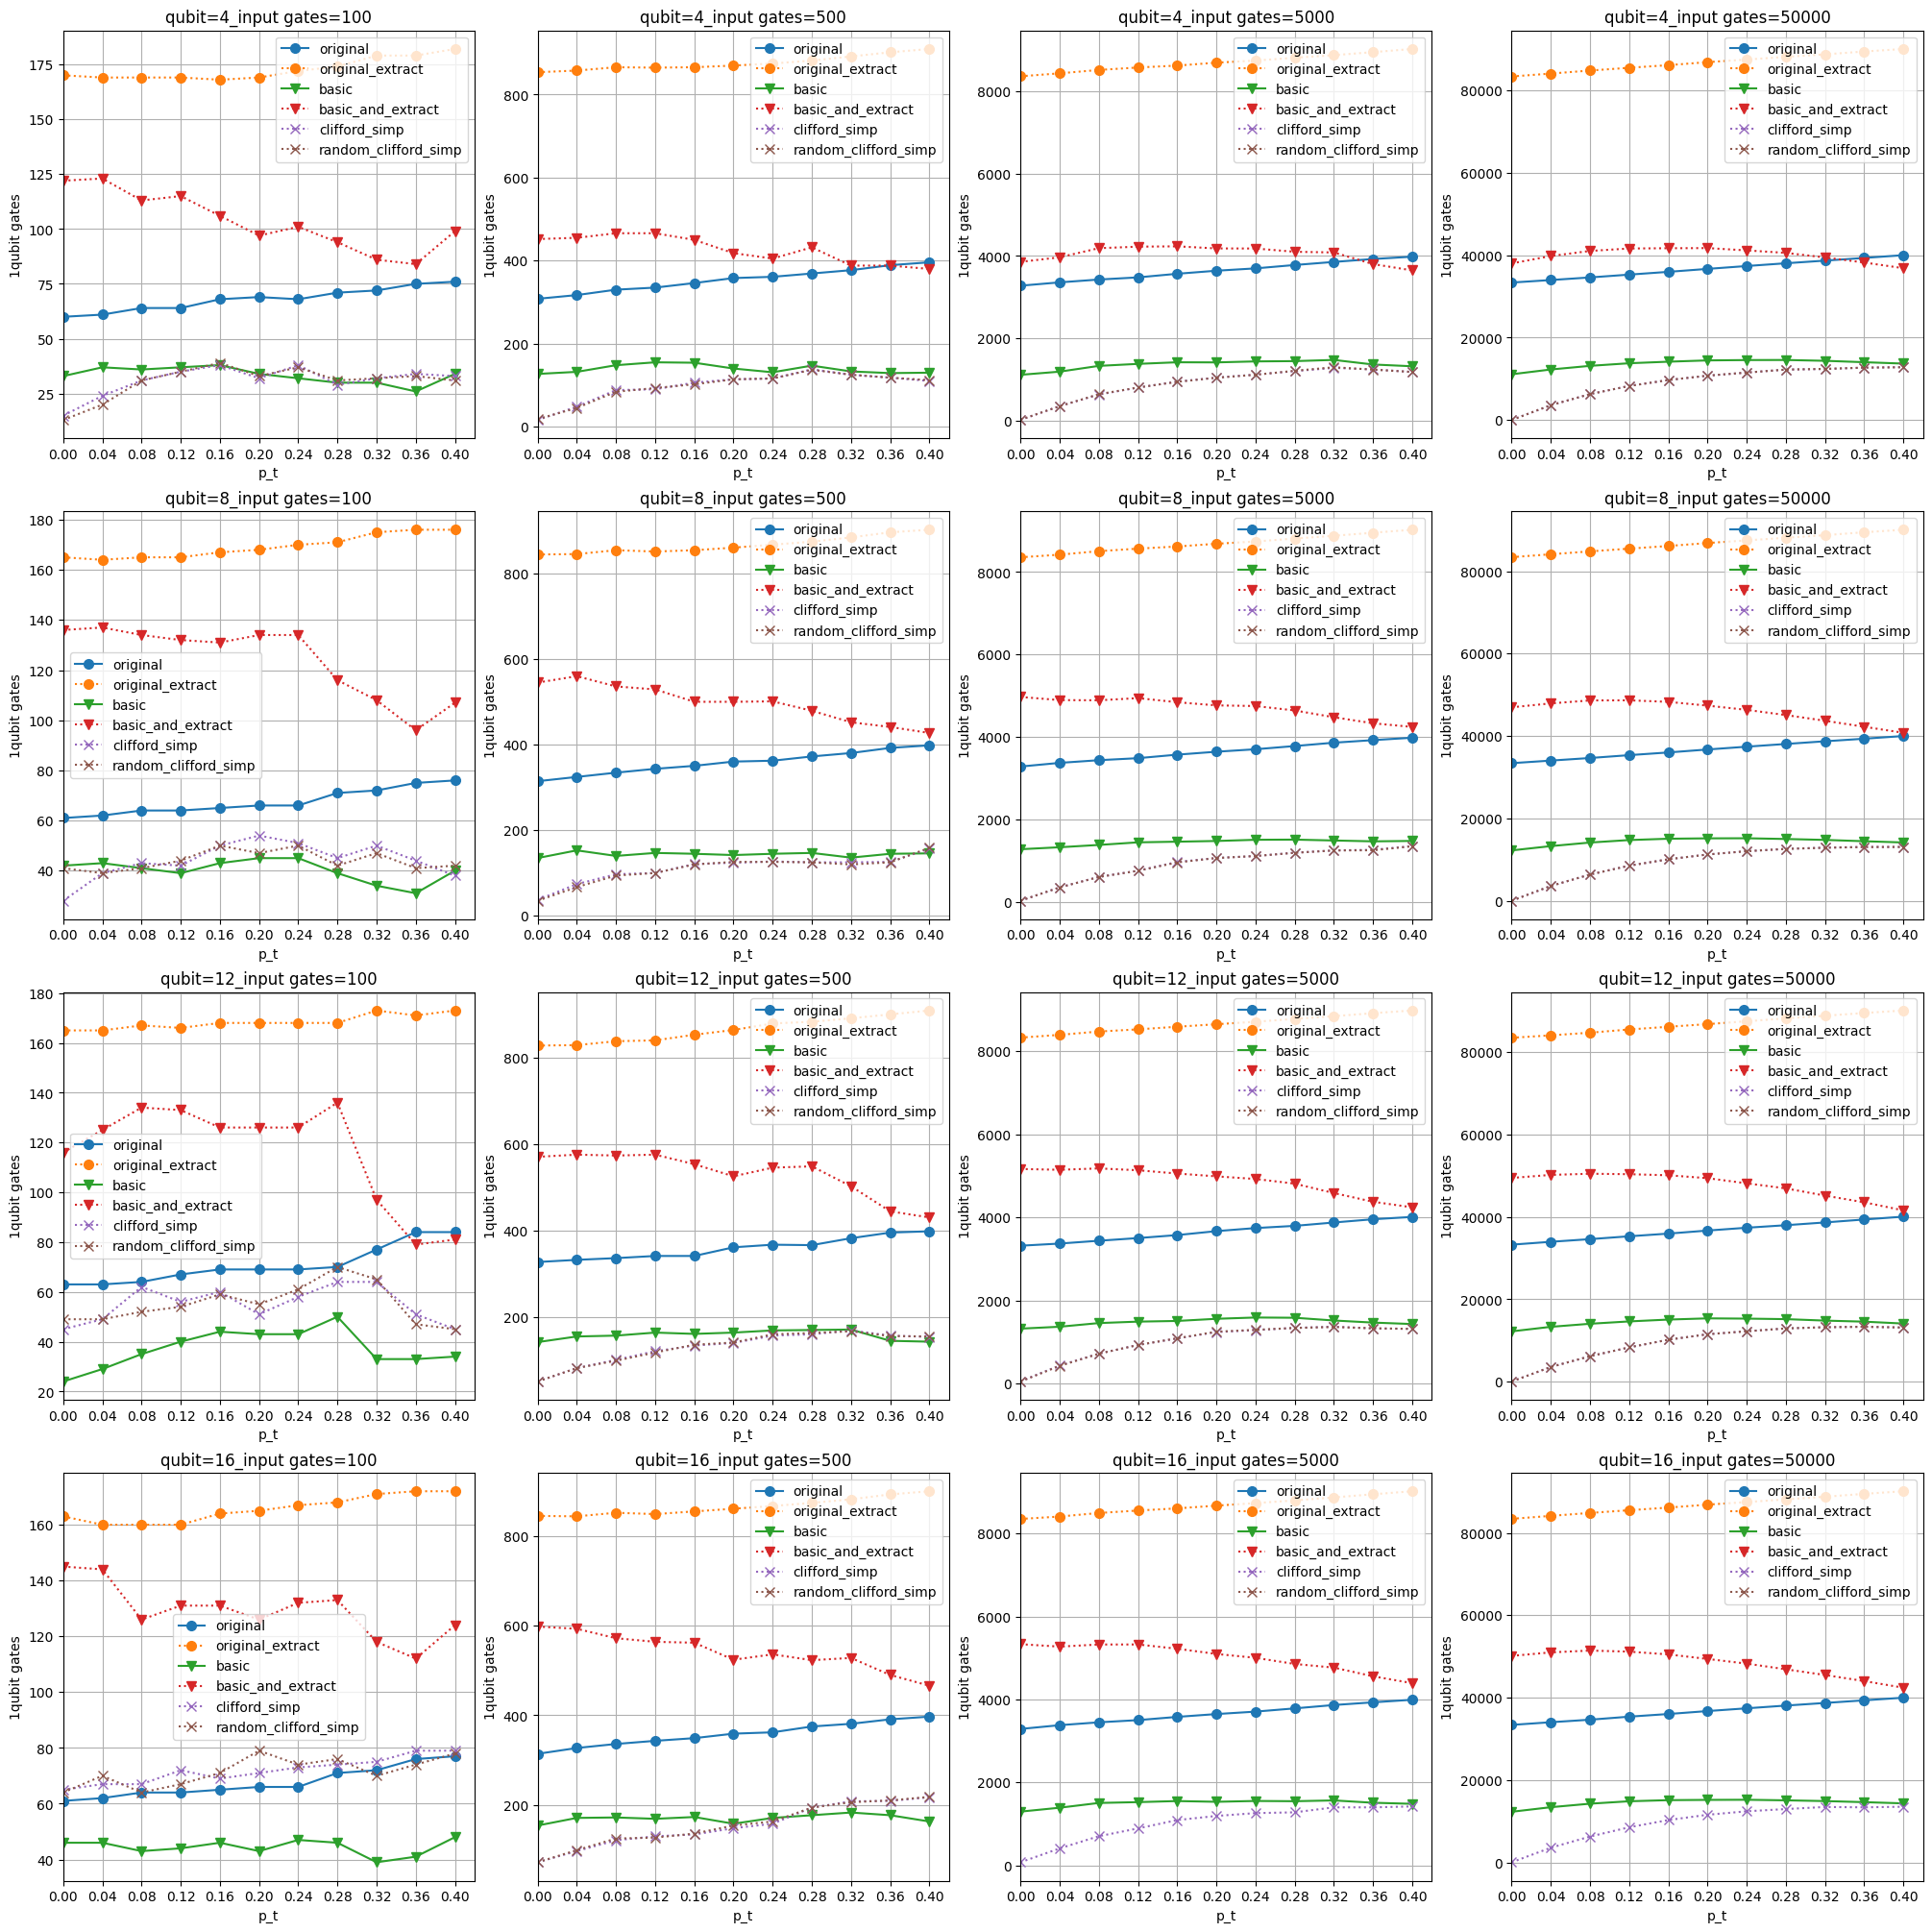

In [ ]:
qubits = [4,8,12,16]
gates = [100,500,5000,50000]
p_t_lists = [i * 0.04 for i in range(0, 11)]
optimize_name = ["original","original_extract","basic","basic_and_extract","clifford_simp","random_clifford_simp"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits), len(gates),figsize=(20, 20),constrained_layout=True)

#p_tを変化させた時のゲート数
for qubit in range(len(qubits)):
    for gate in range(len(gates)):
        ax[qubit][gate].set_title(f"qubit={qubits[qubit]}_input gates={gates[gate]}")
        ax[qubit][gate].set_xlabel("p_t")
        ax[qubit][gate].set_ylabel("1qubit gates")
        ax[qubit][gate].set_xlim(min(p_t_lists),max(p_t_lists)+0.02)
        ax[qubit][gate].set_xticks(p_t_lists)
        ax[qubit][gate].set_ylim(0,gates[gate]*2.25)
        ax[qubit][gate].grid(True)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) & (df["gates_bef"] == gates[gate]) & (df["qubits"] == qubits[qubit])]

            if optimize == "clifford_simp" or optimize == "random_clifford_simp":
                plot_style = 'x'
            elif optimize == "basic" or optimize == "basic_and_extract":
                plot_style = 'v'
            else: 
                plot_style = 'o'
            if optimize == "original_extract" or optimize == "basic_and_extract" or optimize == "clifford_simp" or optimize == "random_clifford_simp":
                ls = ':'
            else:
                ls = '-'

            ax[qubit][gate].plot(data["p_t"],data["1qubit_gate"],plot_style,linestyle=ls,markersize=7,label=optimize)
            ax[qubit, gate].legend()

plt.show()

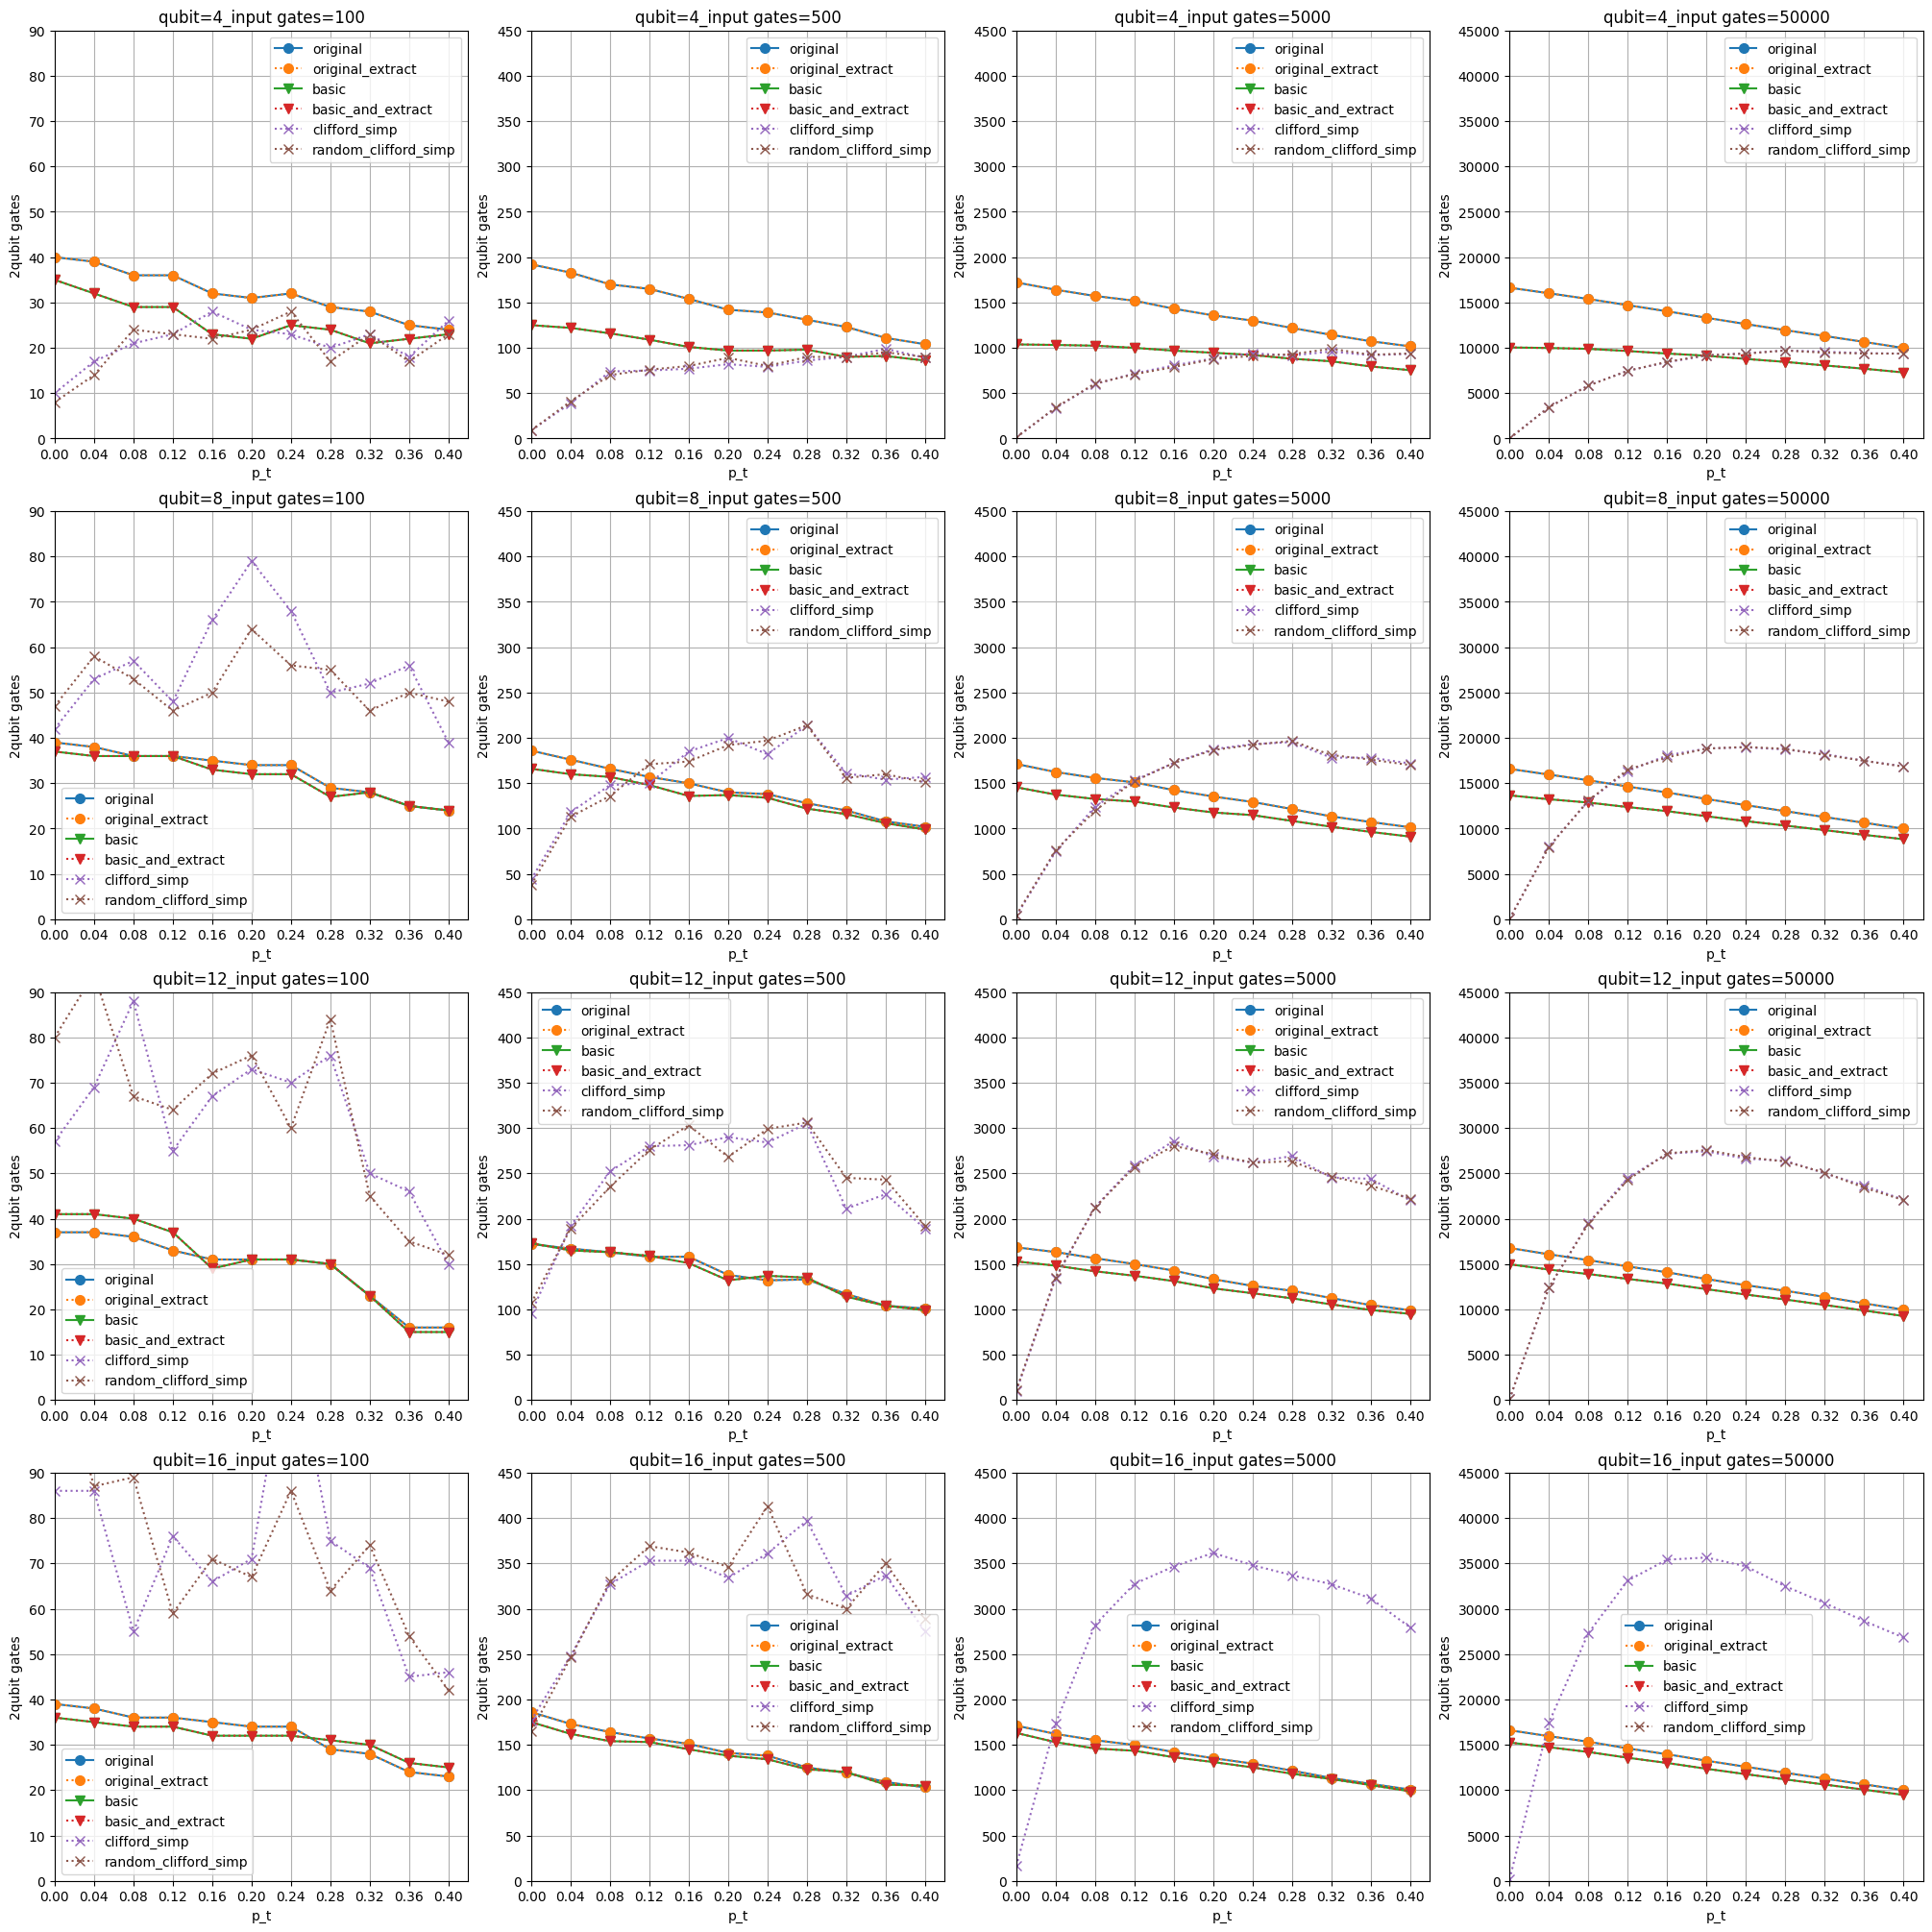

In [ ]:
qubits = [4,8,12,16]
gates = [100,500,5000,50000]
p_t_lists = [i * 0.04 for i in range(0, 11)]
optimize_name = ["original","original_extract","basic","basic_and_extract","clifford_simp","random_clifford_simp"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits), len(gates),figsize=(20, 20),constrained_layout=True)

#p_tを変化させた時のゲート数
for qubit in range(len(qubits)):
    for gate in range(len(gates)):
        ax[qubit][gate].set_title(f"qubit={qubits[qubit]}_input gates={gates[gate]}")
        ax[qubit][gate].set_xlabel("p_t")
        ax[qubit][gate].set_ylabel("2qubit gates")
        ax[qubit][gate].set_xlim(min(p_t_lists),max(p_t_lists)+0.02)
        ax[qubit][gate].set_xticks(p_t_lists)

        ax[qubit][gate].set_ylim(0, gates[gate])
        ax[qubit][gate].grid(True)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) & (df["gates_bef"] == gates[gate]) & (df["qubits"] == qubits[qubit])]

            if optimize == "clifford_simp" or optimize == "random_clifford_simp":
                plot_style = 'x'
            elif optimize == "basic" or optimize == "basic_and_extract":
                plot_style = 'v'
            else: 
                plot_style = 'o'
            if optimize == "original_extract" or optimize == "basic_and_extract" or optimize == "clifford_simp" or optimize == "random_clifford_simp":
                ls = ':'
            else:
                ls = '-'

            ax[qubit][gate].plot(data["p_t"],data["2qubit_gate"],plot_style,linestyle=ls,markersize=7,label=optimize)
            ax[qubit, gate].legend()

plt.show()

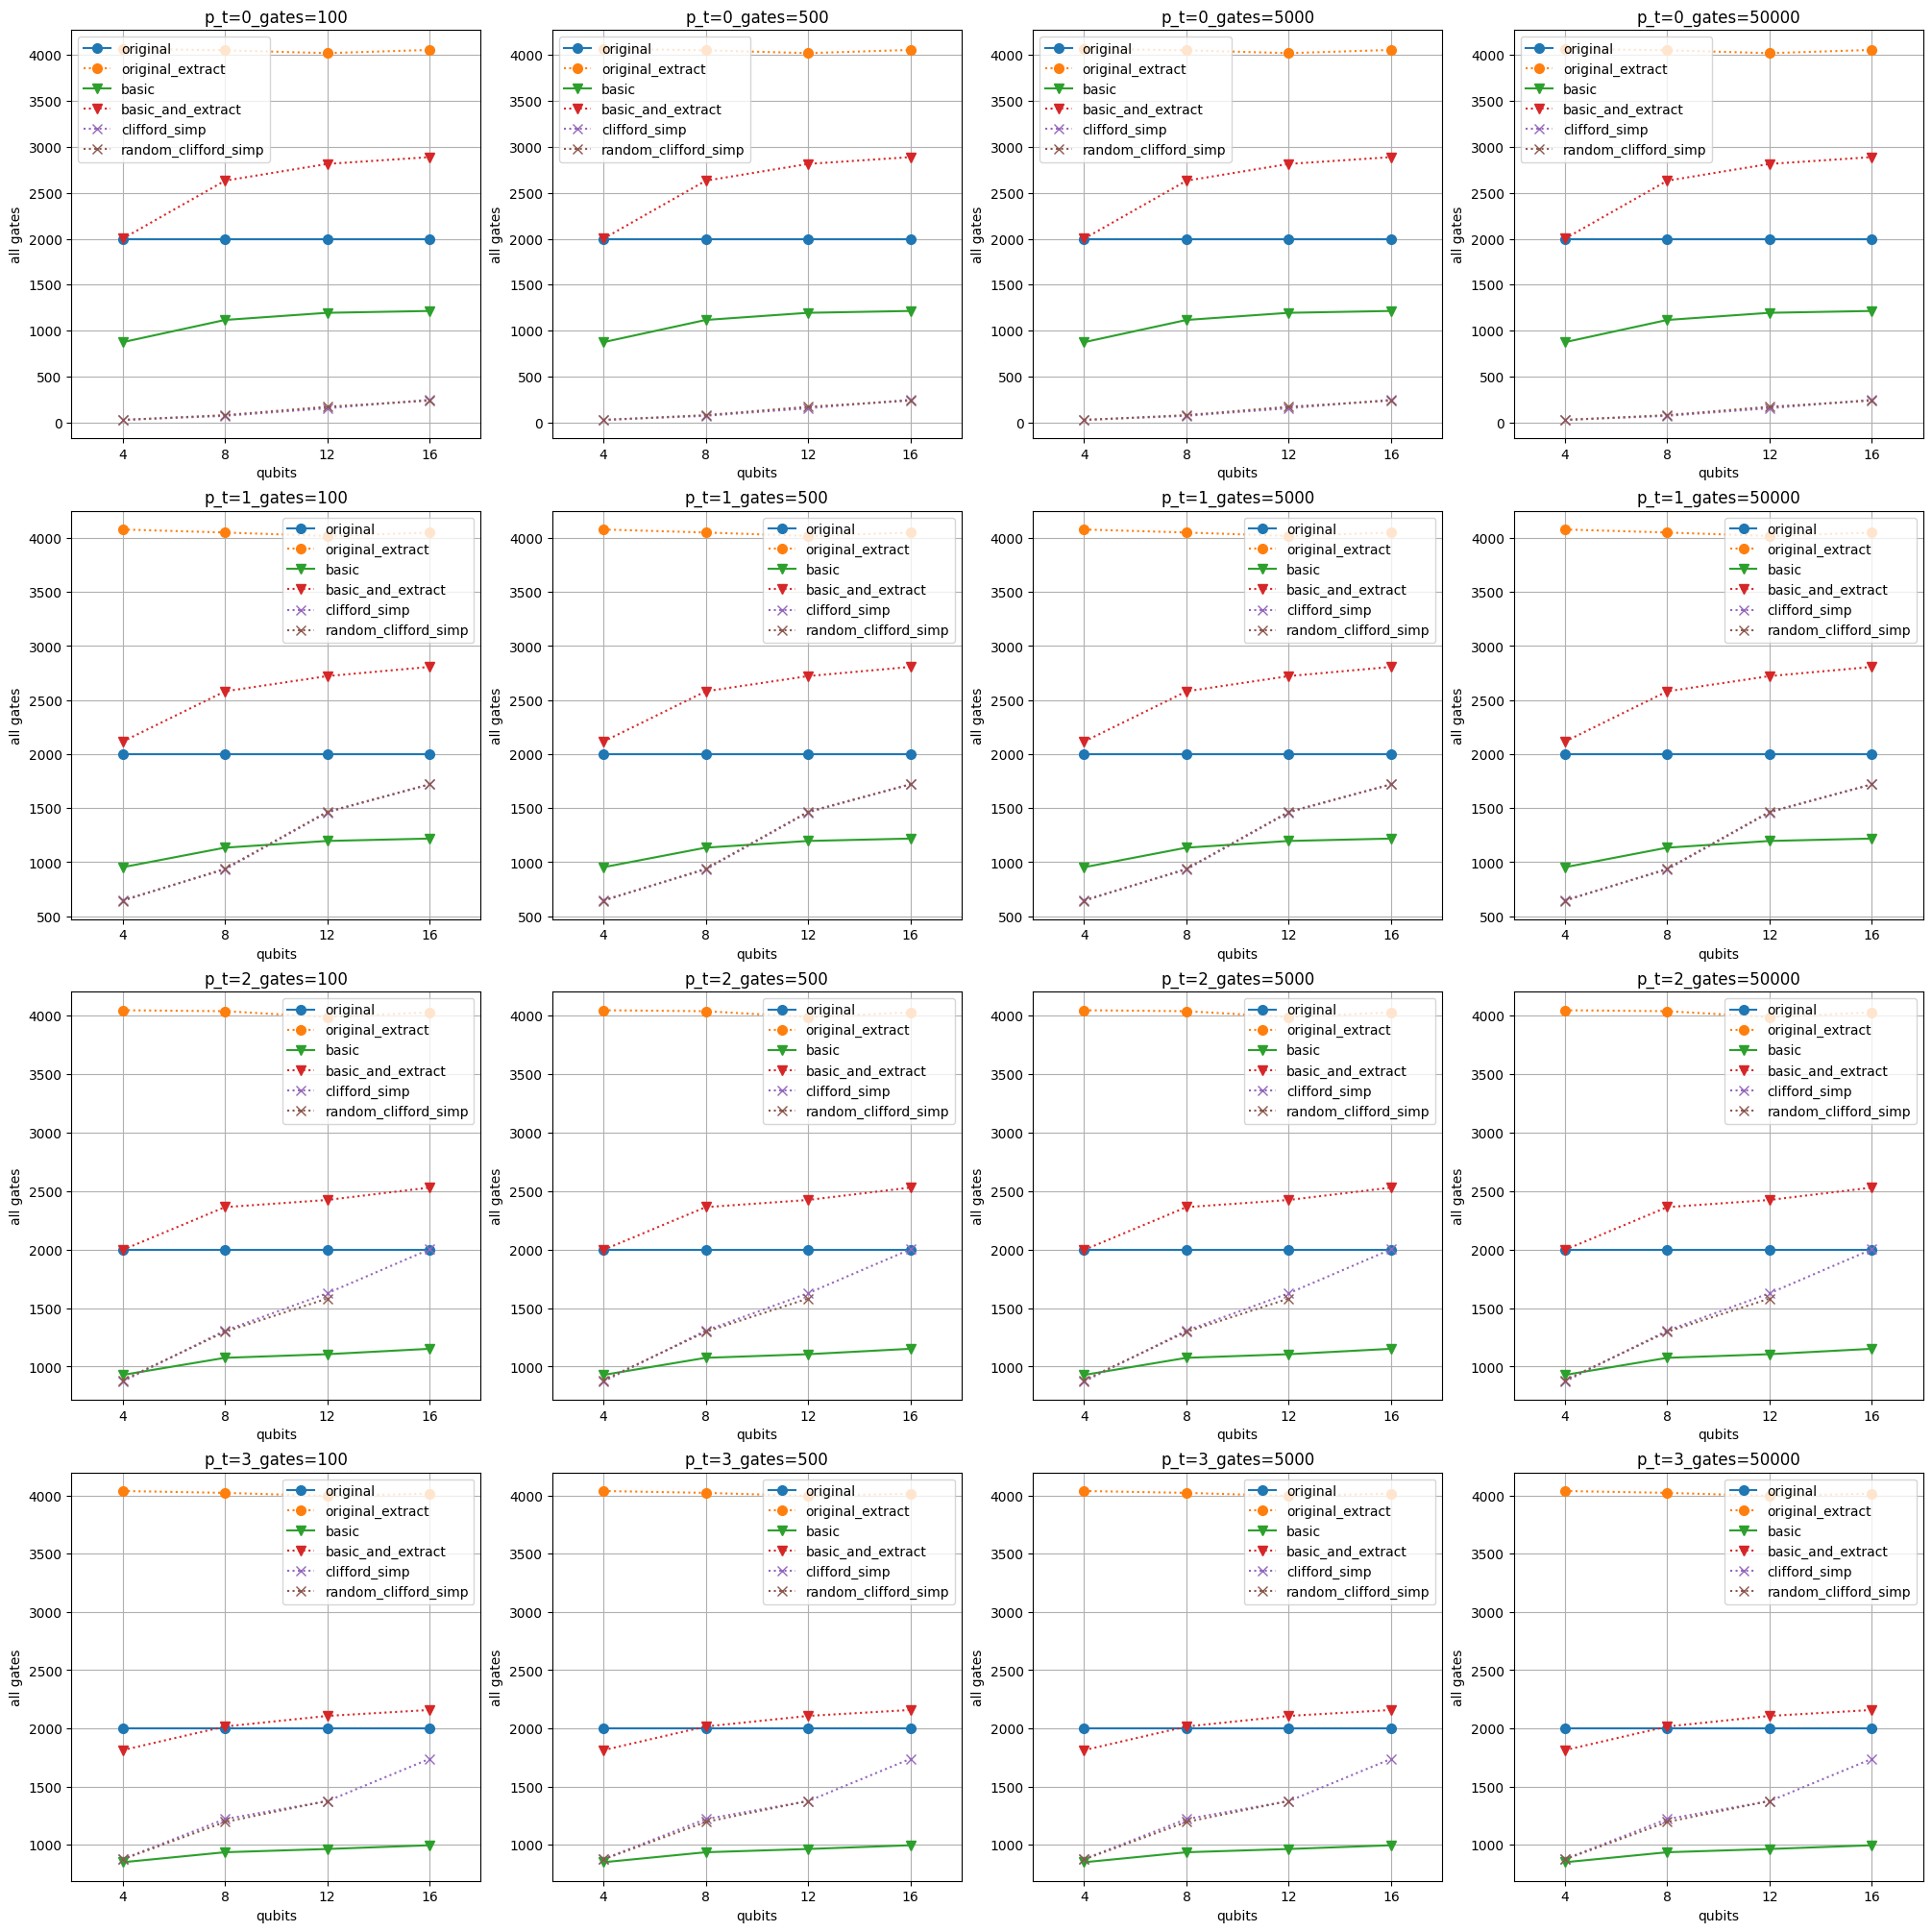

In [ ]:
qubits = [4,8,12,16]
gates = [100,500,1000,2000,5000,10000,50000,100000]
p_t_lists = [i * 0.04 for i in range(0, 11)]
for_plot_p_t_lists = [0.00 ,0.12,0.28,0.40]
for_plot_gates_lists = [100,500,5000,50000]
optimize_name = ["original","original_extract","basic","basic_and_extract","clifford_simp","random_clifford_simp"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits), len(for_plot_p_t_lists),figsize=(20, 20),constrained_layout=True)

#p_tを変化させた時のゲート数
for i in range(len(for_plot_p_t_lists)):
    for j in range(len(for_plot_gates_lists)):
        ax[i][j].set_title(f"p_t={i}_gates={for_plot_gates_lists[j]}")
        ax[i][j].set_xlabel("qubits")
        ax[i][j].set_ylabel("all gates")
        ax[i][j].set_xlim(2,18)
        ax[i][j].set_xticks(qubits)
        ax[i][j].set_ylim(0,gates[gate]*2.25)
        ax[i][j].grid(True)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) & (df["gates_bef"] == gates[gate]) & (df["p_t"] == for_plot_p_t_lists[i])]

            if optimize == "clifford_simp" or optimize == "random_clifford_simp":
                plot_style = 'x'
            elif optimize == "basic" or optimize == "basic_and_extract":
                plot_style = 'v'
            else: 
                plot_style = 'o'
            if optimize == "original_extract" or optimize == "basic_and_extract" or optimize == "clifford_simp" or optimize == "random_clifford_simp":
                ls = ':'
            else:
                ls = '-'
            ax[i][j].plot(data["qubits"],data["gates_aft"],plot_style,linestyle=ls,markersize=7,label=optimize)
            ax[i, j].legend()
plt.show()

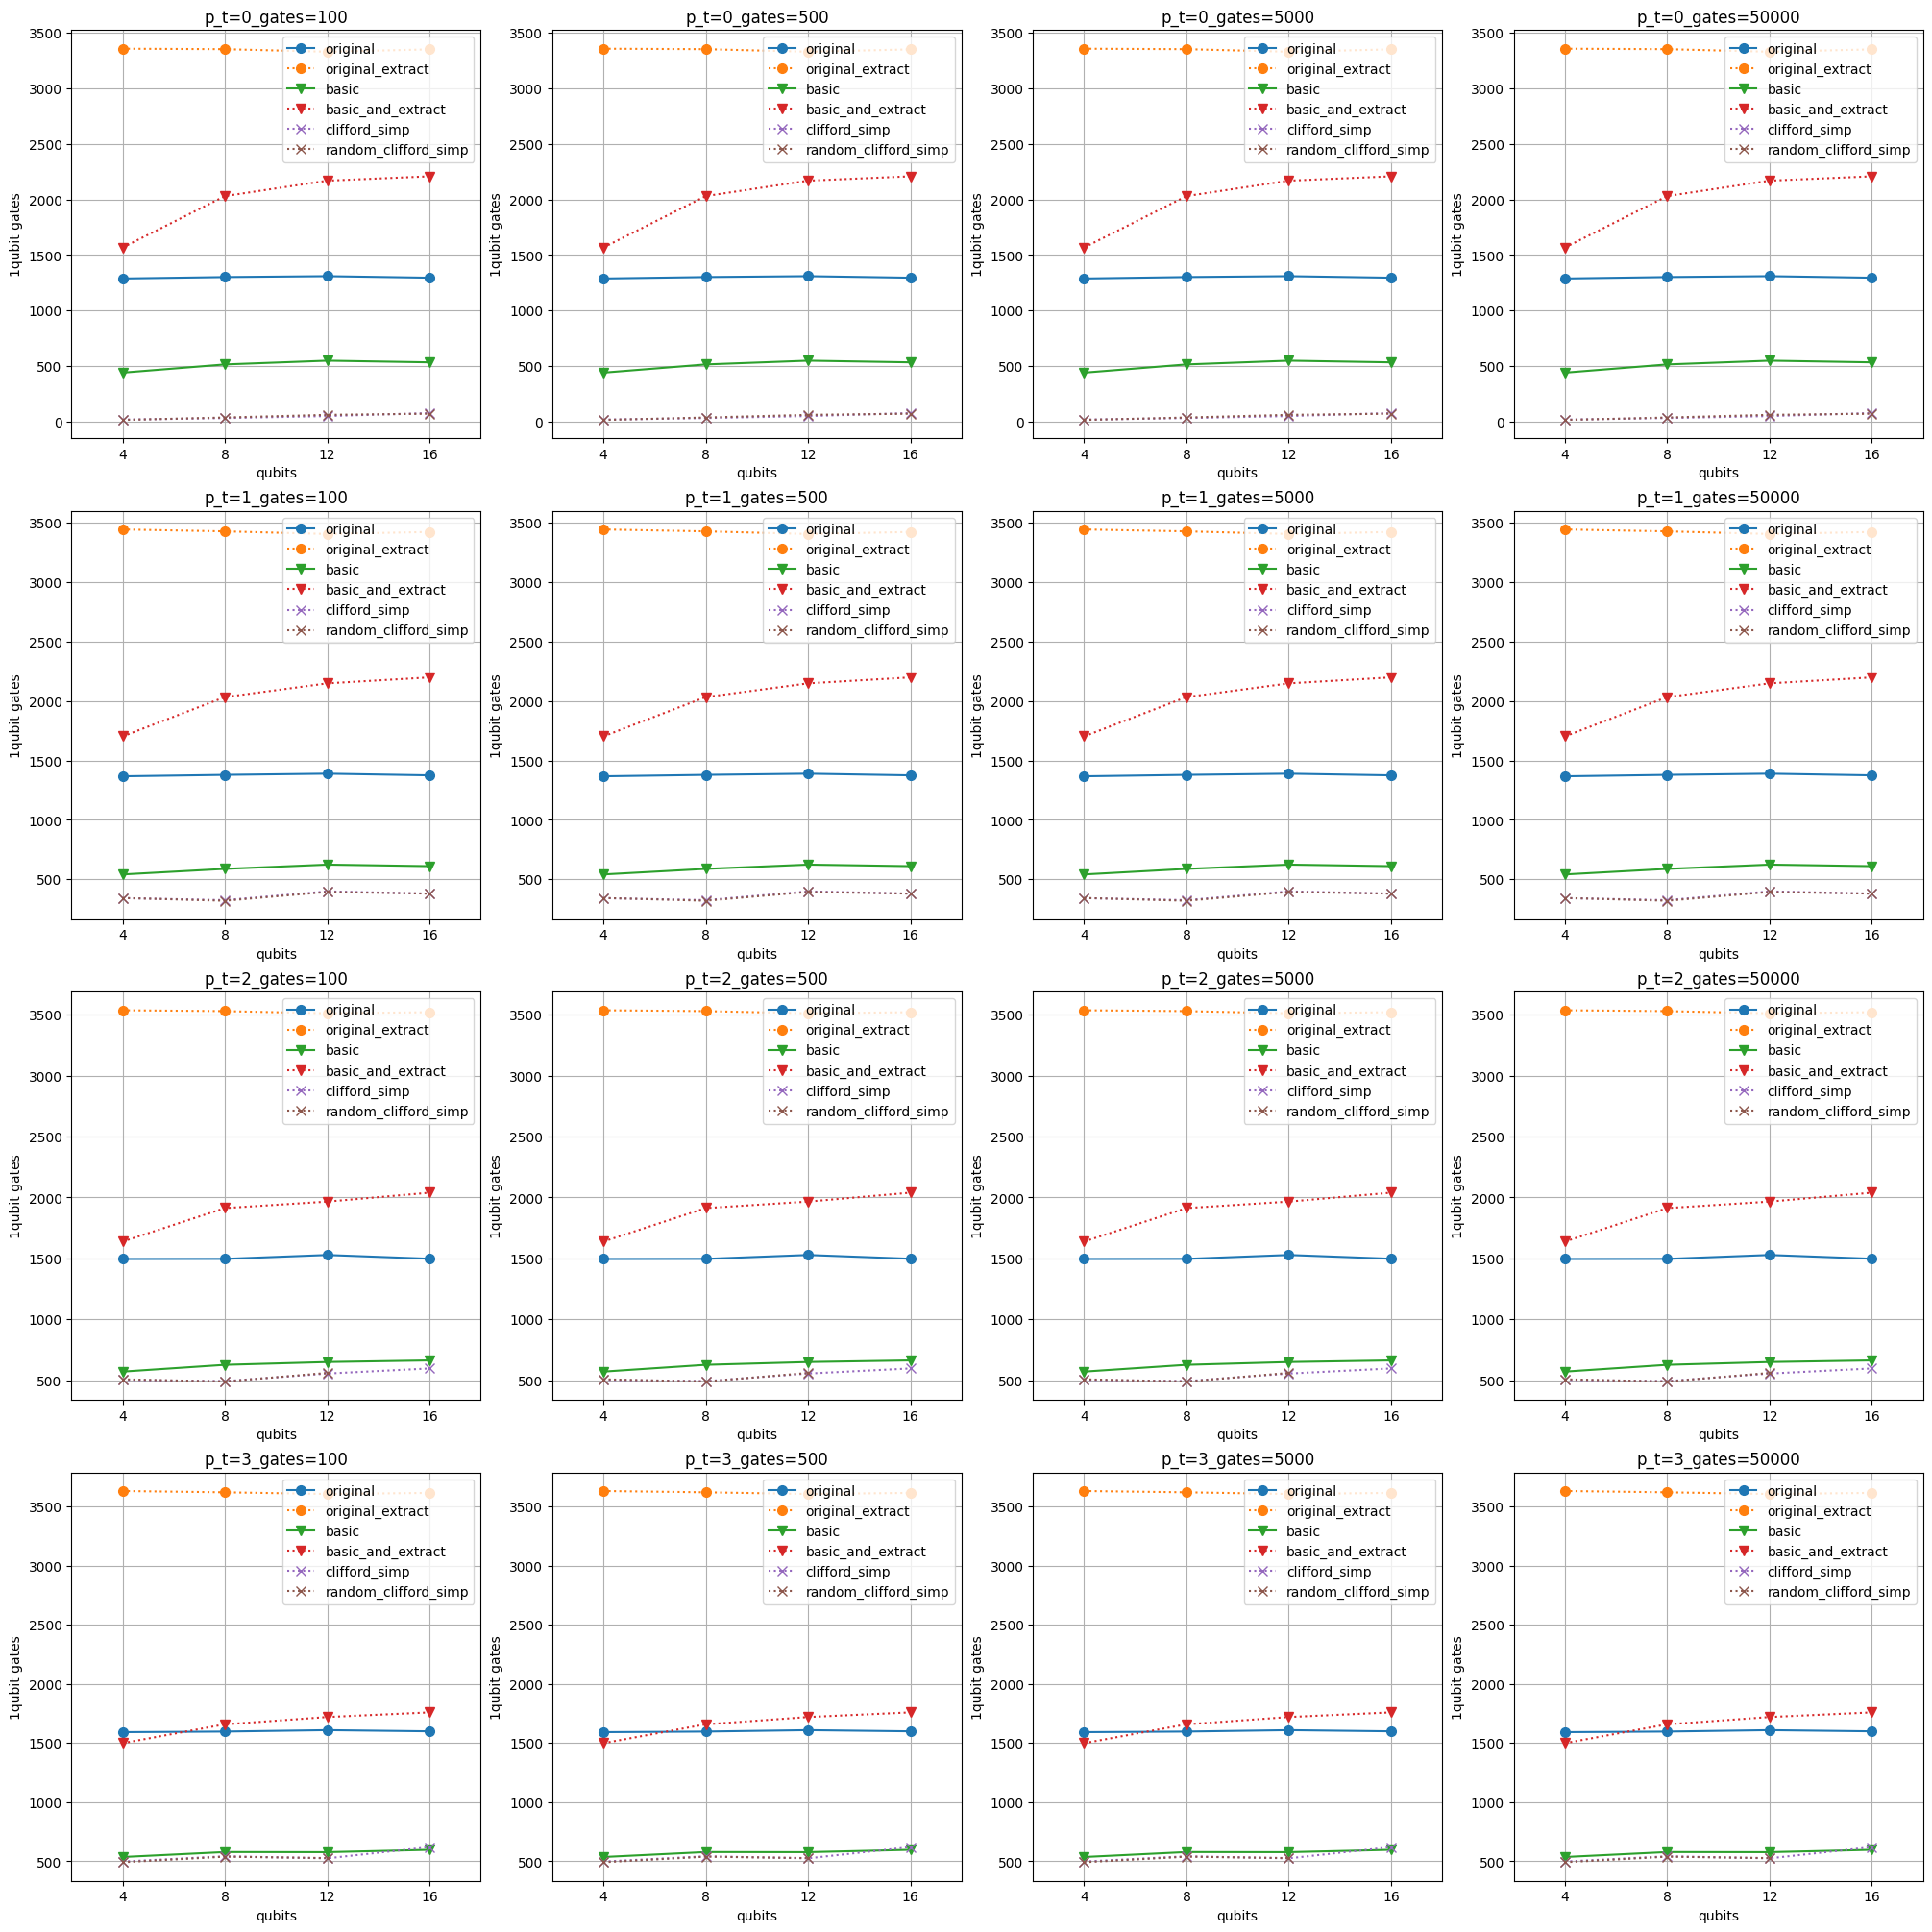

In [138]:
qubits = [4,8,12,16]
gates = [100,500,1000,2000,5000,10000,50000,100000]
p_t_lists = [i * 0.04 for i in range(0, 11)]
for_plot_p_t_lists = [0.00 ,0.12,0.28,0.40]
for_plot_gates_lists = [100,500,5000,50000]
optimize_name = ["original","original_extract","basic","basic_and_extract","clifford_simp","random_clifford_simp"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits), len(for_plot_p_t_lists),figsize=(20, 20),constrained_layout=True)

#p_tを変化させた時のゲート数
for i in range(len(for_plot_p_t_lists)):
    for j in range(len(for_plot_gates_lists)):
        ax[i][j].set_title(f"p_t={i}_gates={for_plot_gates_lists[j]}")
        ax[i][j].set_xlabel("qubits")
        ax[i][j].set_ylabel("1qubit gates")
        ax[i][j].set_xlim(2,18)
        ax[i][j].set_xticks(qubits)
        ax[i][j].grid(True)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) & (df["gates_bef"] == gates[gate]) & (df["p_t"] == for_plot_p_t_lists[i])]

            if optimize == "clifford_simp" or optimize == "random_clifford_simp":
                plot_style = 'x'
            elif optimize == "basic" or optimize == "basic_and_extract":
                plot_style = 'v'
            else: 
                plot_style = 'o'
            if optimize == "original_extract" or optimize == "basic_and_extract" or optimize == "clifford_simp" or optimize == "random_clifford_simp":
                ls = ':'
            else:
                ls = '-'
            ax[i][j].plot(data["qubits"],data["1qubit_gate"],plot_style,linestyle=ls,markersize=7,label=optimize)
            ax[i, j].legend()
plt.show()

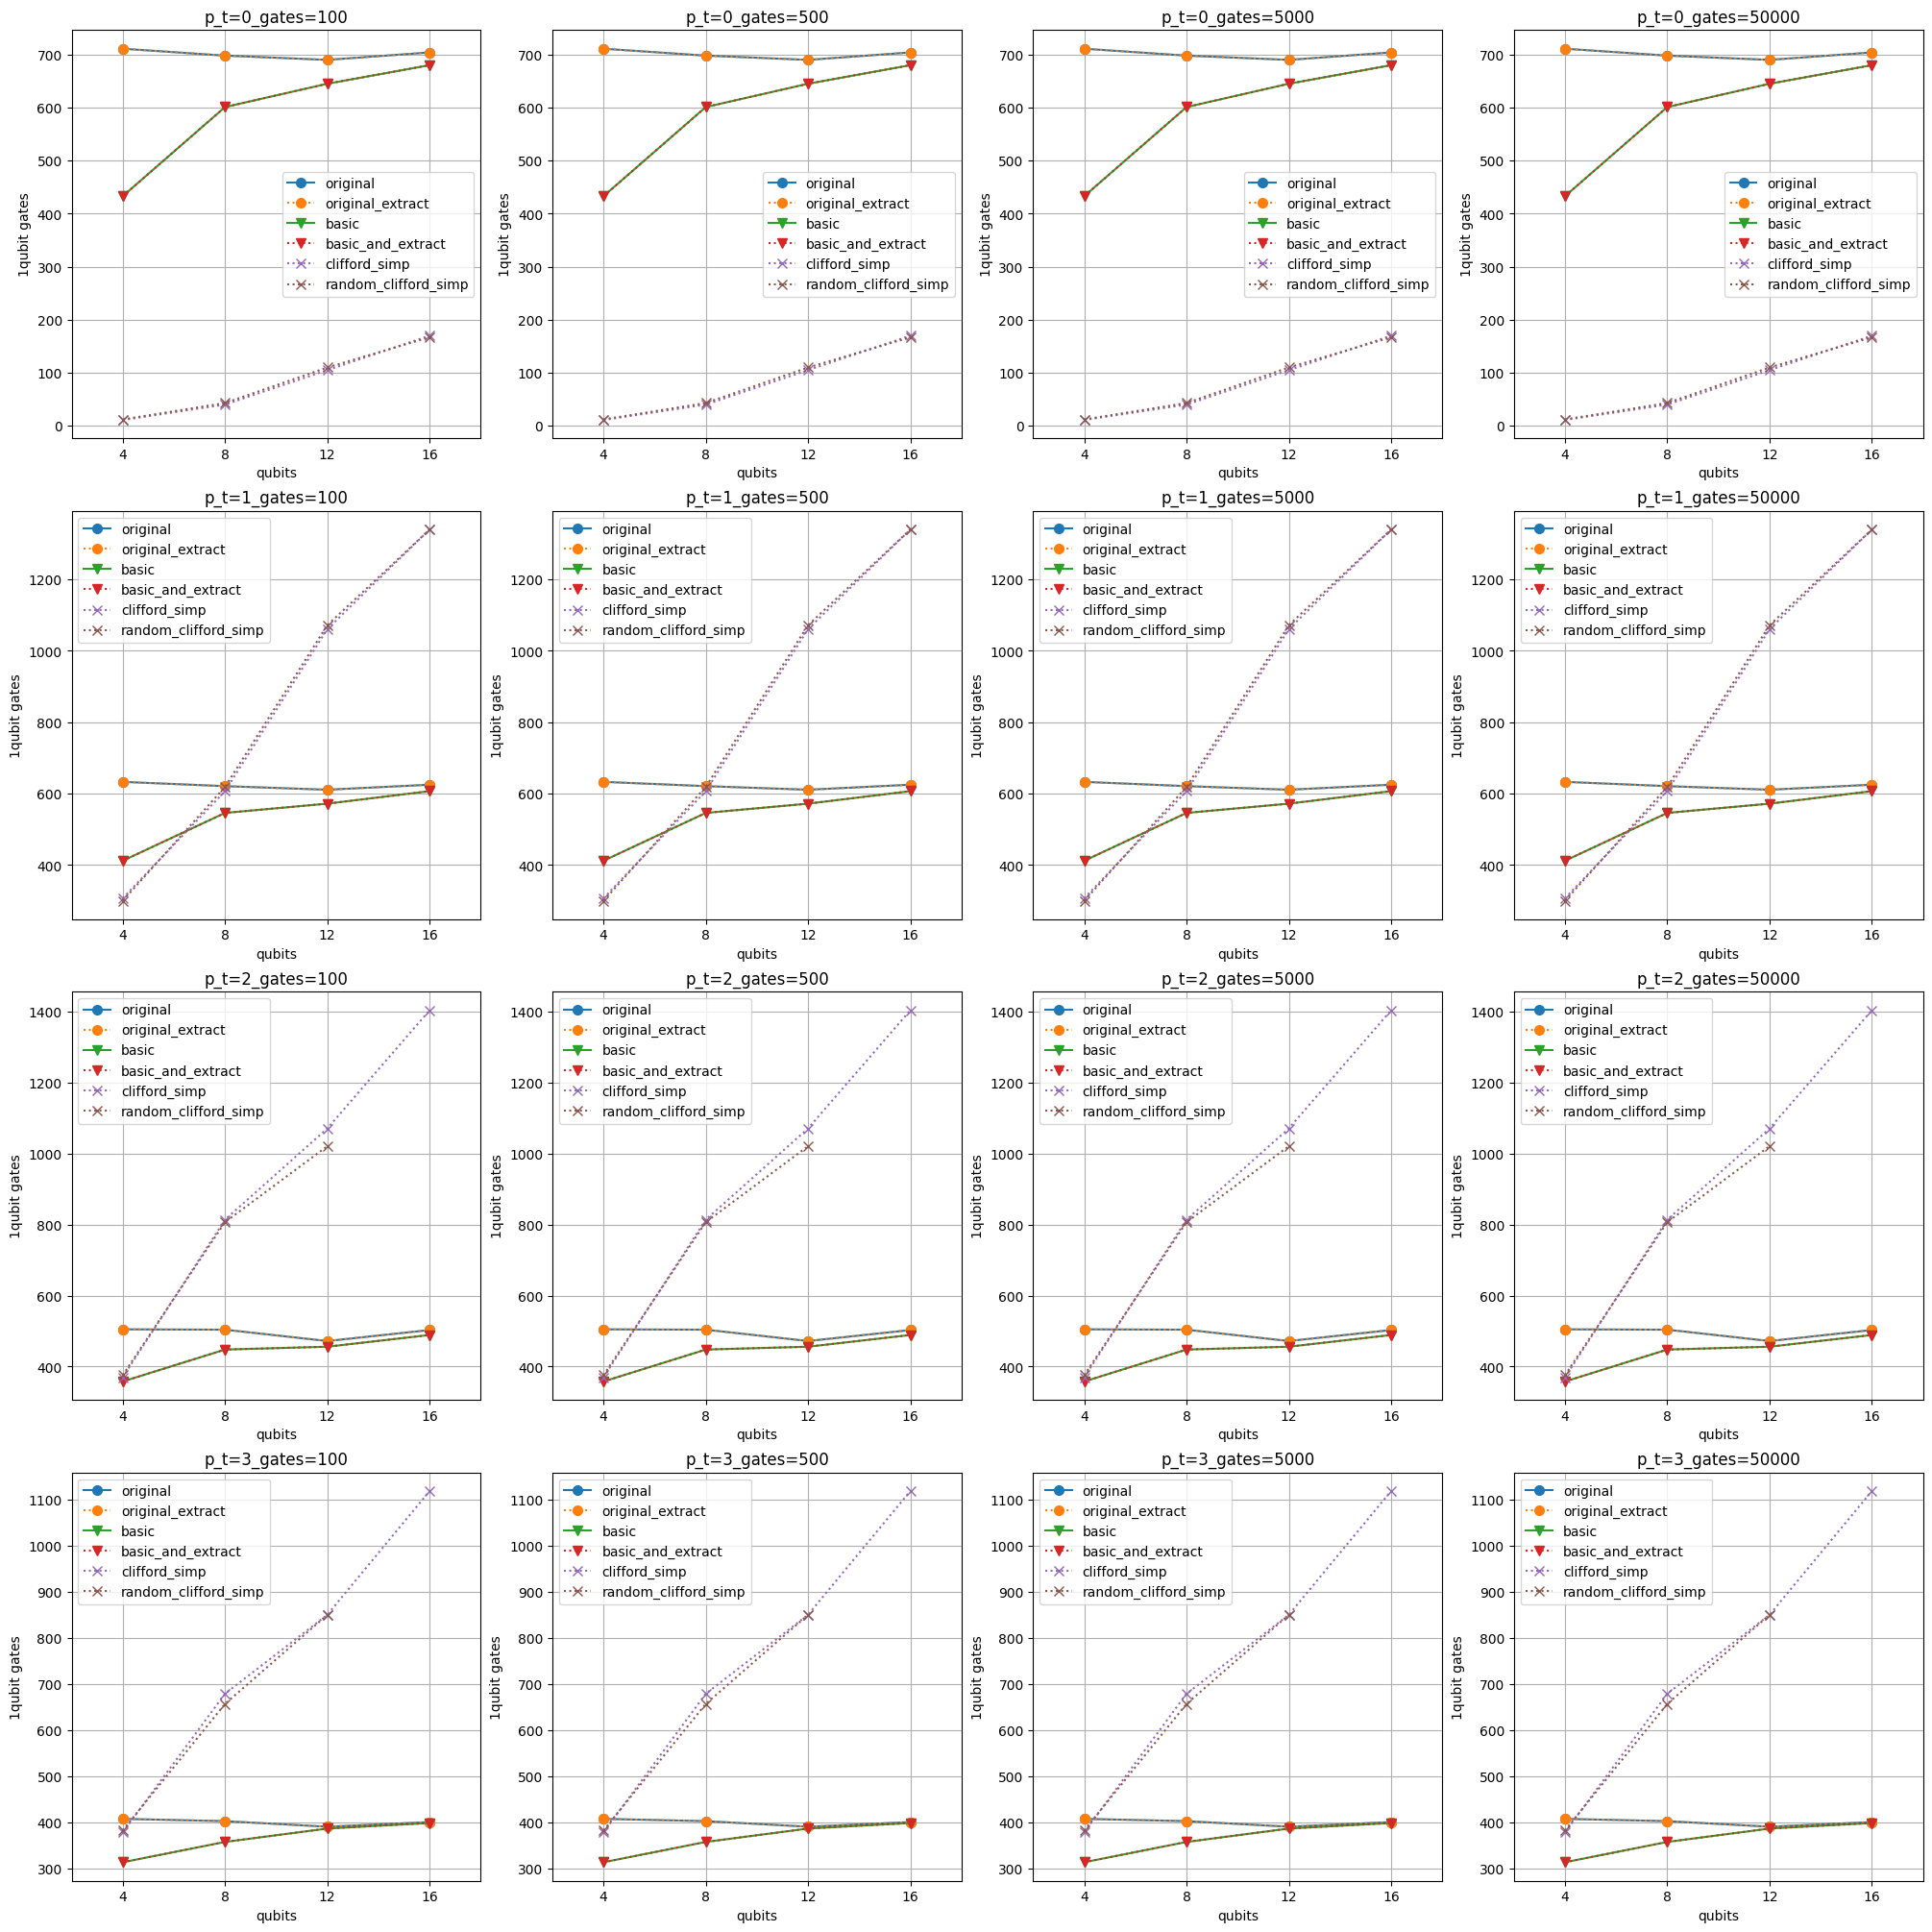

In [139]:
qubits = [4,8,12,16]
gates = [100,500,1000,2000,5000,10000,50000,100000]
p_t_lists = [i * 0.04 for i in range(0, 11)]
for_plot_p_t_lists = [0.00 ,0.12,0.28,0.40]
for_plot_gates_lists = [100,500,5000,50000]
optimize_name = ["original","original_extract","basic","basic_and_extract","clifford_simp","random_clifford_simp"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits), len(for_plot_p_t_lists),figsize=(20, 20),constrained_layout=True)

#p_tを変化させた時のゲート数
for i in range(len(for_plot_p_t_lists)):
    for j in range(len(for_plot_gates_lists)):
        ax[i][j].set_title(f"p_t={i}_gates={for_plot_gates_lists[j]}")
        ax[i][j].set_xlabel("qubits")
        ax[i][j].set_ylabel("1qubit gates")
        ax[i][j].set_xlim(2,18)
        ax[i][j].set_xticks(qubits)
        ax[i][j].grid(True)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) & (df["gates_bef"] == gates[gate]) & (df["p_t"] == for_plot_p_t_lists[i])]

            if optimize == "clifford_simp" or optimize == "random_clifford_simp":
                plot_style = 'x'
            elif optimize == "basic" or optimize == "basic_and_extract":
                plot_style = 'v'
            else: 
                plot_style = 'o'
            if optimize == "original_extract" or optimize == "basic_and_extract" or optimize == "clifford_simp" or optimize == "random_clifford_simp":
                ls = ':'
            else:
                ls = '-'
            ax[i][j].plot(data["qubits"],data["2qubit_gate"],plot_style,linestyle=ls,markersize=7,label=optimize)
            ax[i, j].legend()
plt.show()

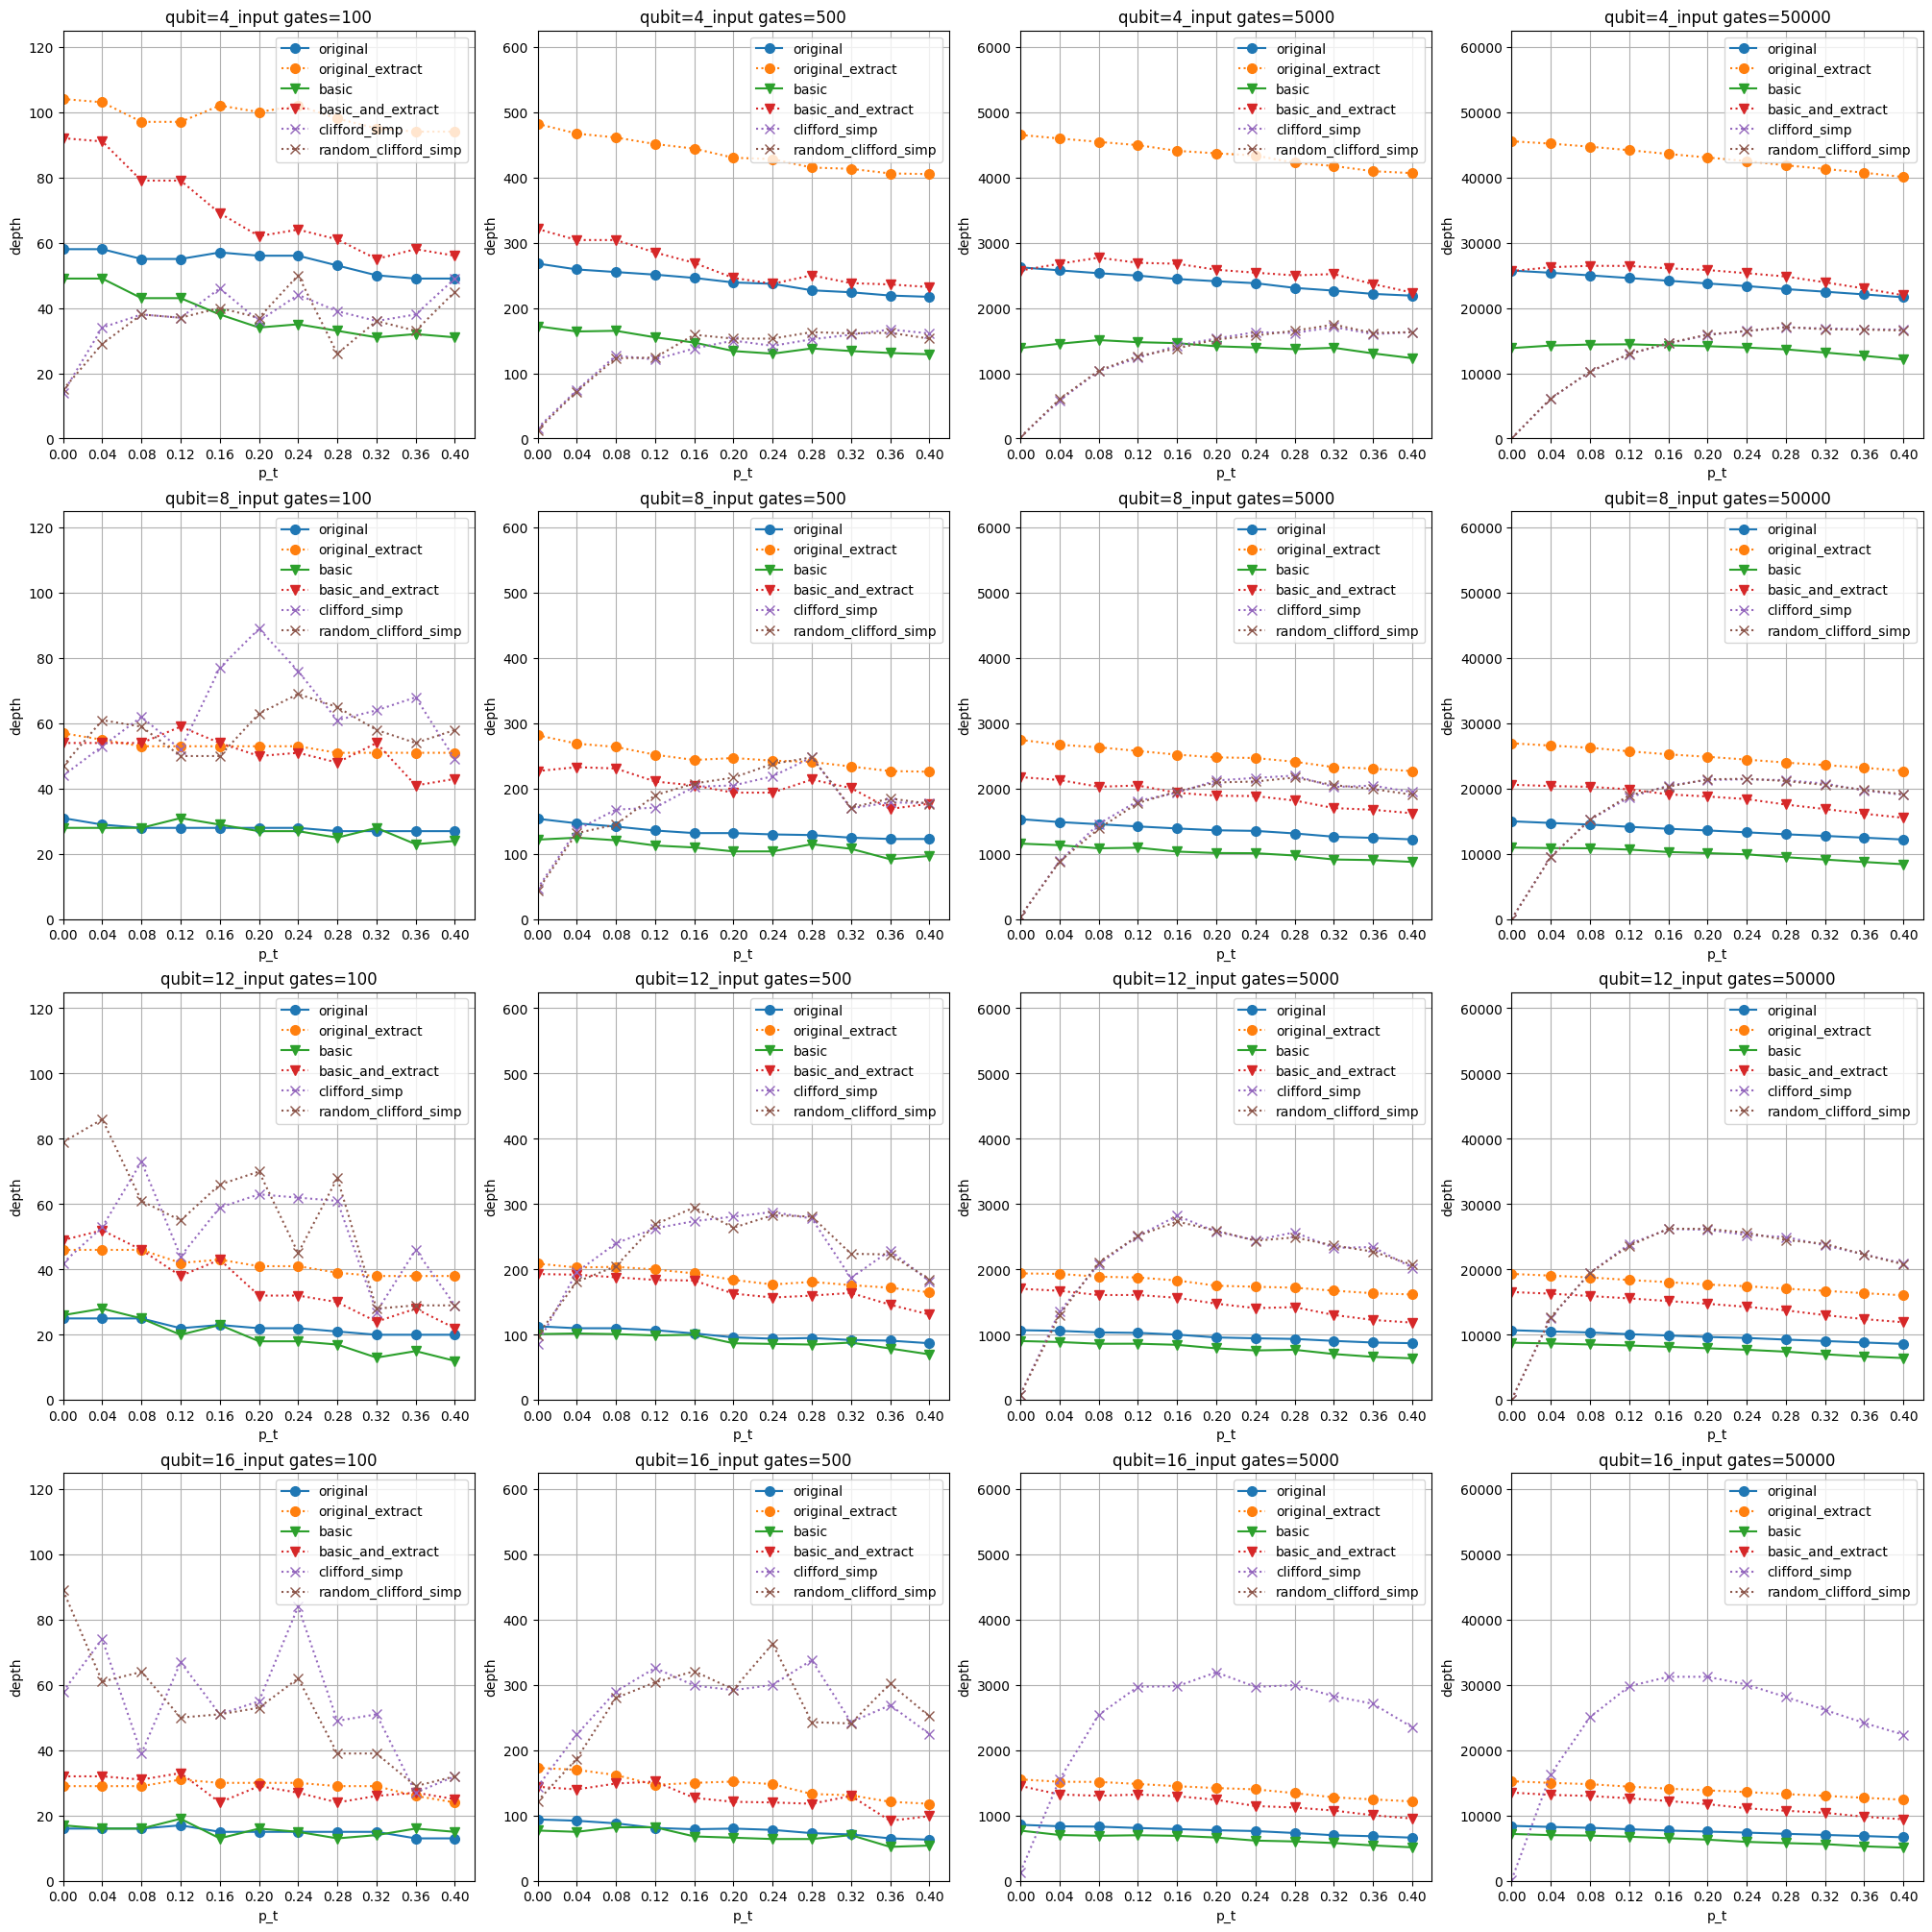

In [6]:
qubits = [4,8,12,16]
gates = [100,500,5000,50000]
p_t_lists = [i * 0.04 for i in range(0, 11)]
optimize_name = ["original","original_extract","basic","basic_and_extract","clifford_simp","random_clifford_simp"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits), len(gates),figsize=(20, 20),constrained_layout=True)

#p_tを変化させた時のゲート数
for qubit in range(len(qubits)):
    for gate in range(len(gates)):
        ax[qubit][gate].set_title(f"qubit={qubits[qubit]}_input gates={gates[gate]}")
        ax[qubit][gate].set_xlabel("p_t")
        ax[qubit][gate].set_ylabel("depth")
        ax[qubit][gate].set_xlim(min(p_t_lists),max(p_t_lists)+0.02)
        ax[qubit][gate].set_xticks(p_t_lists)
        ax[qubit][gate].set_ylim(0,gates[gate]*1.25)
        ax[qubit][gate].grid(True)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) & (df["gates_bef"] == gates[gate]) & (df["qubits"] == qubits[qubit])]

            if optimize == "clifford_simp" or optimize == "random_clifford_simp":
                plot_style = 'x'
            elif optimize == "basic" or optimize == "basic_and_extract":
                plot_style = 'v'
            else: 
                plot_style = 'o'
            if optimize == "original_extract" or optimize == "basic_and_extract" or optimize == "clifford_simp" or optimize == "random_clifford_simp":
                ls = ':'
            else:
                ls = '-'

            ax[qubit][gate].plot(data["p_t"],data["depth"],plot_style,linestyle=ls,markersize=7,label=optimize)
            ax[qubit, gate].legend()

plt.show()